# Compressing Spectrograms

Here is one way to compress a spectrogram.  Alternatively, you could modify the original data (e.g., by changing the sample rate), but this is easy to do with the data you have.

The first step is to load the data and visualize it.

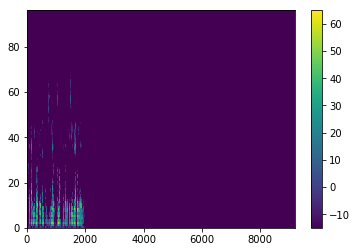

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# load the data and visualize it (kind of slow, but it does eventually finish)
data = np.load('afrikaans4.mp3.npz')
plt.pcolor(data['melgram'].squeeze())
plt.colorbar()
plt.show()

## Decimation

The easiest way to reduce the dimensionality of the data is to simply throw out every nth sample.  This strategy is known as decimation.

(1, 96, 9177, 1)
(96, 918)


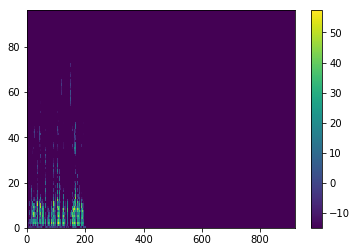

In [28]:
print(data['melgram'].shape)          # should be (1, 96, 9177, 1)
_, rows, cols, _ = data['melgram'].shape
n = 10            # how much to reduce the dimensionality of the data
reduced = data['melgram'][0,:,np.arange(0,cols,n),0].T  # for some reason the data was coming back transposed, so I undid this by adding my own tranpsoe (T) operator
print(reduced.shape)
plt.pcolor(reduced)
plt.colorbar()
plt.show()

## Interpolation

Another strategy is to use fancier methods like [spline interpolation](https://en.wikipedia.org/wiki/Spline_interpolation).  The basic idea is to summarize the data by fitting a local model (e.g., a  line, a quadratic, or a cubic) and then use that model to come up with the values for the reduced signal.  Below, I'm using thed default spline model which is third order.

/Users/pruvolo/anaconda3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:600: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


(96, 918)


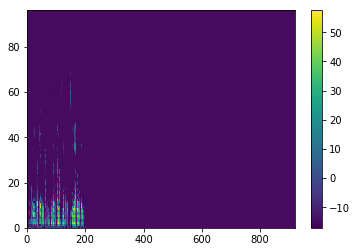

In [27]:
from scipy.misc import imresize
from scipy.ndimage.interpolation import zoom

n = 10            # how much to reduce the dimensionality of the data
reduced2 = zoom(data['melgram'].squeeze().astype(np.float64), [1.0, 1/n])
print(reduced2.shape)
plt.pcolor(reduced2)
plt.colorbar()
plt.show()

## Comparing the Results

Honestly these two don't look all that much different.  It's possible the algorithm could find some differences though.  Just to see what we're looking at, I took the difference between the two reduced arrays and plotted that.

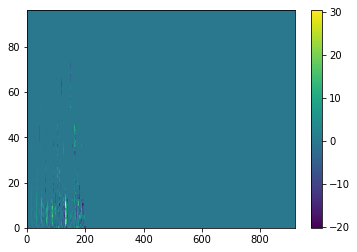

In [26]:
plt.pcolor(reduced2 - reduced)
plt.colorbar()
plt.show()

As you can see these are a bit different, but it's really hard to say if this difference is meaningful.  My gut instinct is that it's not, but I could be wrong.

## Alternatives to Compression

If you want to avoid compressing the raw data, you could use the original data but add more convolutional layers (as we discussed in class).  In order to avoid using two much memory in the first couple of layers, you might also want to limit the number of convolutional kernels in the first few layers.  Once the size of the image is reduced, you could add more kernels (for later layers).